# **Evaluation - Problem 1**

In [216]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import copy
from tqdm import tqdm
import os
import sys
import json


# select current working directory and subfolder to save the files
current_directory = os.getcwd()
subfolder_path = 'data'

# select file path for standardroutes
file_path = os.path.join(current_directory, subfolder_path, 'standard.json')
with open(file_path, 'r') as file:
    org_standardroutes = json.load(file) #yaml.safe_load(file)

# select file path for actual routes
file_path = os.path.join(current_directory, subfolder_path, 'actual.json')
with open(file_path, 'r') as file:
    org_actual_routes = json.load(file)

# run another notebook to load the function compute_similarities() to compute the similarity scores for each standardroute-actual-route-pair
# this notebook also runs the notebook for data generation to load the function show_route() to visualize routes which is part of the similarity score functions
%run "functions_similarity_score_evaluation.ipynb"

Functions for data generation successfully loaded.
Functions for similarity score computations successfully loaded.


# **A: Original Standardroutes**

In [217]:
org_scores = compute_similarites(input_sr=org_standardroutes, input_ar=org_actual_routes, prints=False)

Processing:   0%|          | 0/100000 [00:00<?, ?iteration/s]

Processing: 100%|██████████| 100000/100000 [02:52<00:00, 579.92iteration/s]


All scores successfully computed.
Mean similarity score: 0.6137


### **Analyse the similarity scores**

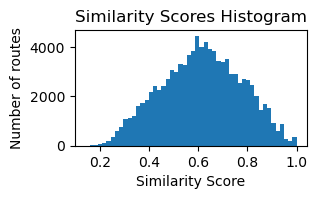

[{'id': 'a1', 'driver': 'I', 'sroute': 's1', 'score': 0.6862002376708259},
 {'id': 'a2', 'driver': 'F', 'sroute': 's1', 'score': 0.7001566664632038},
 {'id': 'a3', 'driver': 'B', 'sroute': 's1', 'score': 0.3886640283024525},
 {'id': 'a4', 'driver': 'J', 'sroute': 's1', 'score': 0.8309178743961353},
 {'id': 'a5', 'driver': 'I', 'sroute': 's1', 'score': 0.669367311632505},
 {'id': 'a6', 'driver': 'D', 'sroute': 's1', 'score': 0.8719432230193629},
 {'id': 'a7', 'driver': 'E', 'sroute': 's1', 'score': 0.8067028985507246},
 {'id': 'a8', 'driver': 'C', 'sroute': 's1', 'score': 0.32547177816244105},
 {'id': 'a9', 'driver': 'C', 'sroute': 's1', 'score': 0.32547177816244105},
 {'id': 'a10', 'driver': 'A', 'sroute': 's1', 'score': 0.8521123863589617}]

In [218]:
# plot a histogram to show the distribution of the similarity scores between 0 and 1
values = np.array([i['score'] for i in org_scores])
plt.figure(figsize=(3, 1.5))
plt.hist(values, density=False, bins=50)
plt.ylabel('Number of routes')
plt.xlabel('Similarity Score')
plt.title('Similarity Scores Histogram')
plt.show()

# view first 10 combinations
org_scores[:10]

In [219]:
# check if any similarity is zero and view the combinations with less than 0.3 similarity score
print('Is any similarity score zero:', np.any(values == 0))
#display([i for i in values if i < 0.3][:10])

# view the combination with the lowest similarity score
idx_min = np.argmin(values)
lowest_score = [i for i in org_scores if i['id'] == str('a' + str(idx_min+1))][0]
standardroute = [i for i in org_standardroutes if i['id'] == lowest_score['sroute']][0]
actual_route = [i for i in org_actual_routes if i['id'] == lowest_score['id']][0]
print("\nLowest score by standardroute '{}' and actual route '{}' from driver '{}' with {} similarity.".format(standardroute['id'], actual_route['id'], actual_route['driver'], np.round(np.min(values), 4)))

# view details
#fun_similarity_score(route1=standardroute, route2=actual_route, prints=True)

Is any similarity score zero: False

Lowest score by standardroute 's15' and actual route 'a72844' from driver 'J' with 0.1417 similarity.


**View the similarity scores for each standardroute separately**


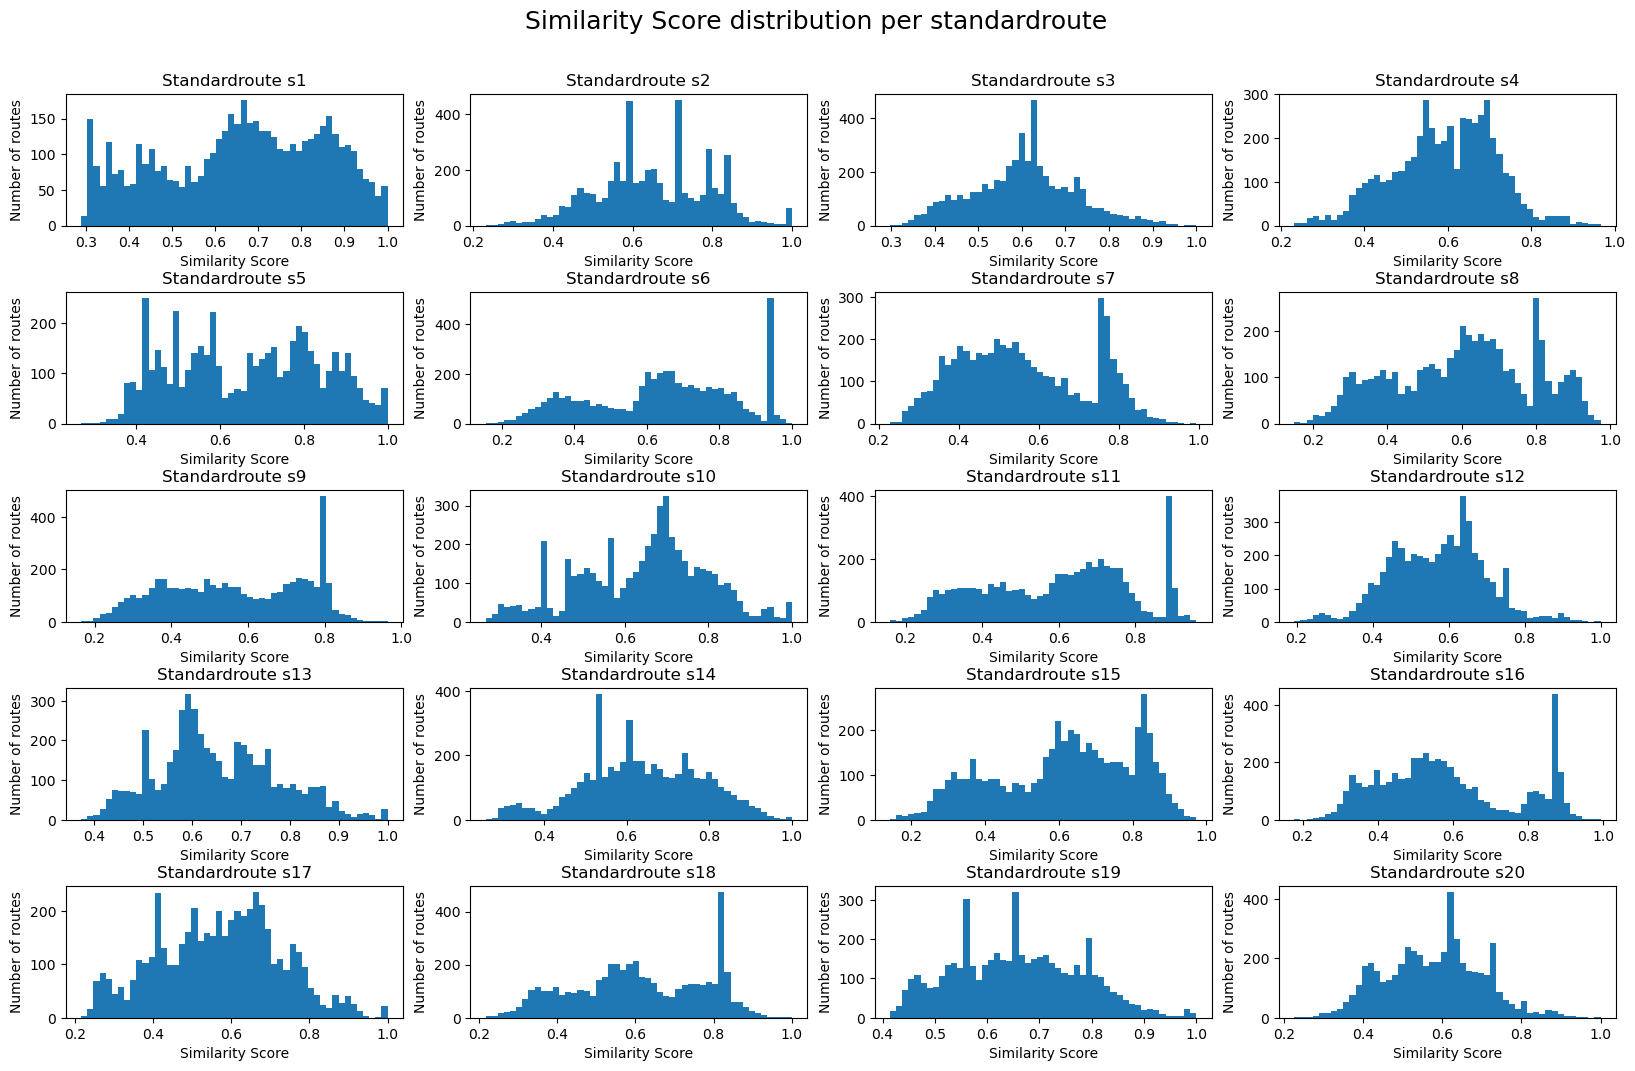

In [220]:
# plot a histogram for every standardroute to show the distribution
standardroute_ids = [i['id'] for i in org_standardroutes]

# define subplot grid
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Similarity Score distribution per standardroute", fontsize=18, y=0.95)

# loop through standardroutes and axes
for id, ax in zip(standardroute_ids, axs.ravel()):
    values = [i['score'] for i in org_scores if i['sroute'] == id]
    ax.hist(values, density=False, bins=50)
    ax.set_ylabel('Number of routes')
    ax.set_xlabel('Similarity Score')
    ax.set_title(f'Standardroute {id}')

plt.show()

**View the similarity scores for each driver separately**

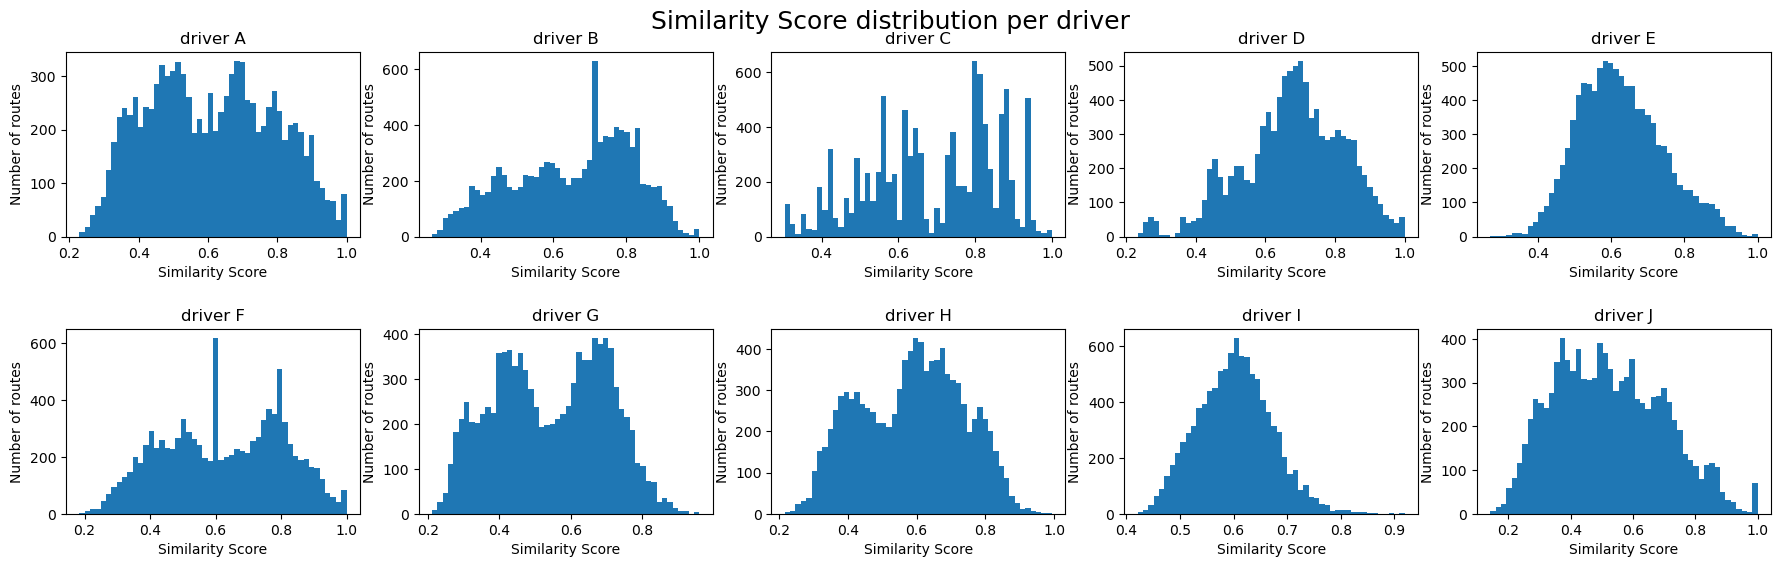

In [221]:
# plot a histogram for every driver to show the distribution
drivers = np.sort(list(set([i['driver'] for i in org_actual_routes])))

# define subplot grid
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(22, 6))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Similarity Score distribution per driver", fontsize=18, y=0.95)

# loop through drivers and axes
for driver, ax in zip(drivers, axs.ravel()):
    values = [i['score'] for i in org_scores if i['driver'] == driver]
    ax.hist(values, density=False, bins=50)
    ax.set_ylabel('Number of routes')
    ax.set_xlabel('Similarity Score')
    ax.set_title(f'driver {driver}')

plt.show()

In [222]:
#del org_actual_routes
#del org_scores
#sys.exit()

# **B: Recommended Standardroutes**
**Load the data**

In [223]:
# select file path for the recommended standardroutes
file_path = os.path.join(current_directory, subfolder_path, 'recStandard.json')
with open(file_path, 'r') as file:
    rec_standardroutes = json.load(file)

# select file path for the parameter dictionary
file_path = os.path.join(current_directory, subfolder_path, 'parameter_dictionary.json')
with open(file_path, 'r') as file:
    parameter_dictionary = json.load(file)

# assign each value to its name in order to be able to use them as variables
for key, value in parameter_dictionary.items():
    if key == 'df_drivers_attributes': locals()[key] = pd.DataFrame(value) #turn dictionary back to DF
    else: locals()[key] = value

### **Create the same amount of actual routes again with the recommended standardroutes and compute similarity scores**

In [224]:
# create new actual routes
rec_actual_routes = fun_aroutes(input_sr=rec_standardroutes, prints=False)

# compute new similarity scores
rec_scores = compute_similarites(input_sr=rec_standardroutes, input_ar=rec_actual_routes, prints=False)

Processing:   0%|          | 0/20 [00:00<?, ?iteration/s]

Processing: 100%|██████████| 100000/100000 [00:57<00:00, 1738.30iteration/s]



All scores successfully computed.
Mean similarity score: 0.5707


### **Analyse the similarity scores**

**View the similarity scores for each driver separately**

In [225]:
### ORIGINAL STANDARDROUTES
# dictionary to store the mean similarity score for each driver (given all original standardroutes)
mean_org_scores_d = {}

# loop to get for each driver the actual routes computed with the original standardroutes and compute the mean similarity
for driver in drivers:

    # extract the driver's similarity scores of all the similarity scores computed before and take the mean
    mean = np.mean([i['score'] for i in org_scores if i['driver'] == driver])

    # append the driver id and mean score to the dictionary
    mean_org_scores_d.update({driver: mean})

### RECOMMENDED STANDARDROUTES
# dictionary to store the mean similarity score for each driver (given all recommended standardroutes)
mean_rec_scores_d = {}

# loop to get for each driver the actual routes computed with all recommended standardroutes and compute the mean similarity
for driver in drivers:

    # extract the driver's similarity scores of all the similarity scores computed before and take the mean
    mean = np.mean([i['score'] for i in rec_scores if i['driver'] == driver])

    # append the driver id and mean score to the dictionary
    mean_rec_scores_d.update({driver: mean})

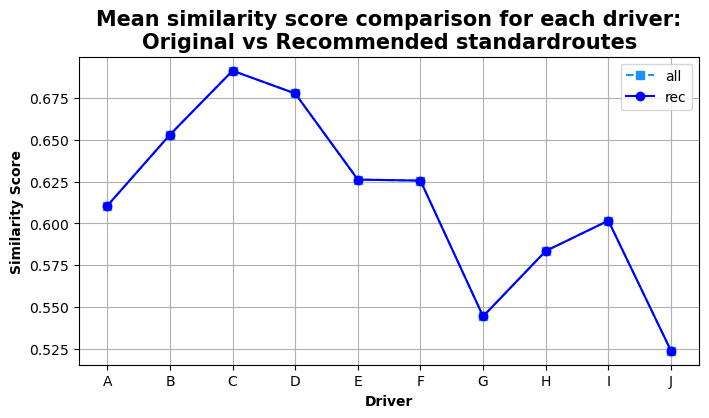

In [226]:
# funciton to compare similarity scores for each driver
def fun_plot_scores(scores1, scores2, color1, color2, label1, label2, title):

    # create plot to compare similarity scores
    plt.figure(figsize=(8, 4))
    plt.plot(drivers, scores1.values(), marker='s', linestyle='--', color=color1, label=label1)
    plt.plot(drivers, scores2.values(), marker='o', linestyle='-', color=color2, label=label2)

    # set title, edit axis and add legend
    plt.title(title, fontsize=15, fontweight='bold')
    plt.ylabel('Similarity Score', fontsize=10, fontweight='bold')
    plt.xlabel('Driver', fontsize=10, fontweight='bold')
    plt.legend(loc='upper right')

    # grid lines
    plt.grid(True)

    return plt.show()

# execute function to compare the scores of original and recommended standardroutes
fun_plot_scores(scores1=mean_org_scores_d, scores2=mean_org_scores_d, #mean_rec_scores_d
                color1='dodgerblue', color2='blue', 
                label1='all', label2='rec', 
                title='Mean similarity score comparison for each driver:\nOriginal vs Recommended standardroutes')

**View appearance of cities, products and quantitites in the recommended standardroutes**


In [227]:
# create lists to store all cities, products and quantities of the recommended standardroutes
cities_sr = []
products_sr = []
quantities_sr = []

for route in actual_routes:
    # get all cities (starting city first, then all destinations)
    route_c = [route['route'][0]['from']]
    route_c += [i['to'] for i in route['route']]

    # get all products (list per trip, then combine lists)
    route_p = [list(i['merchandise'].keys()) for i in route['route']]
    route_p = [item for list in route_p for item in list]

    # get all quantities (list per trip, then combine lists)
    route_q = [i['merchandise'].values() for i in route['route']]
    route_q = [item for list in route_q for item in list]
    
    # append lists of route to the lists of all standardroutes
    cities_sr += route_c
    products_sr += route_p
    quantities_sr += route_q
    
# count the appearances of all values in every list
from collections import Counter

city_counts = dict(Counter(cities_sr))
product_counts = dict(Counter(products_sr))
quantitiy_counts = dict(Counter(quantities_sr))

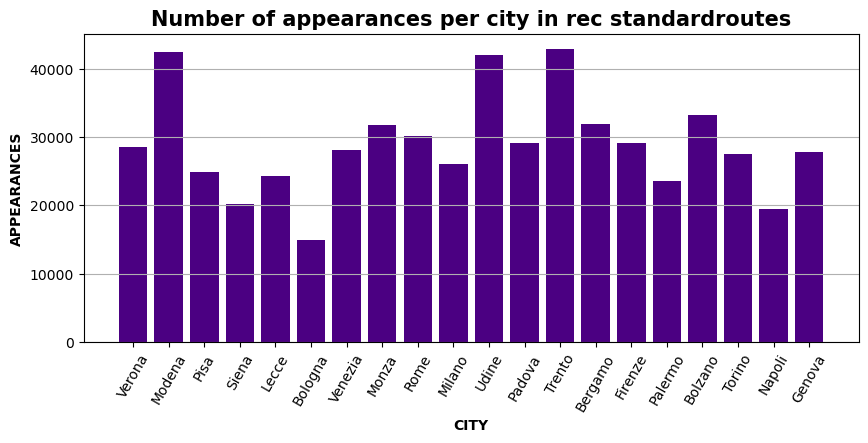

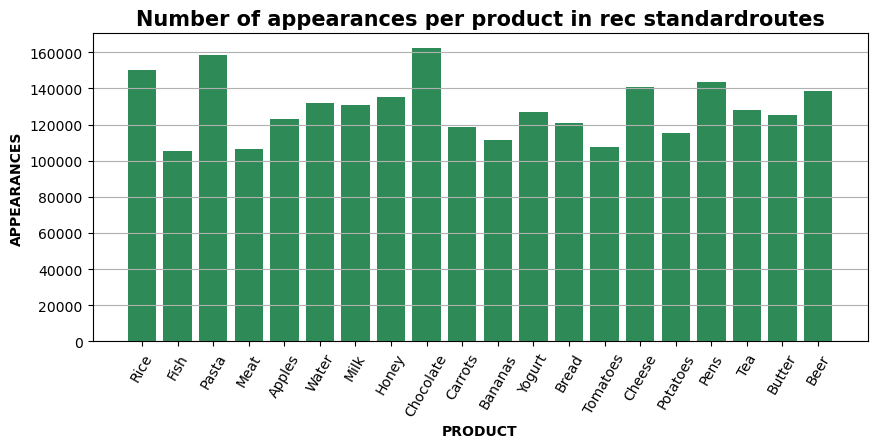

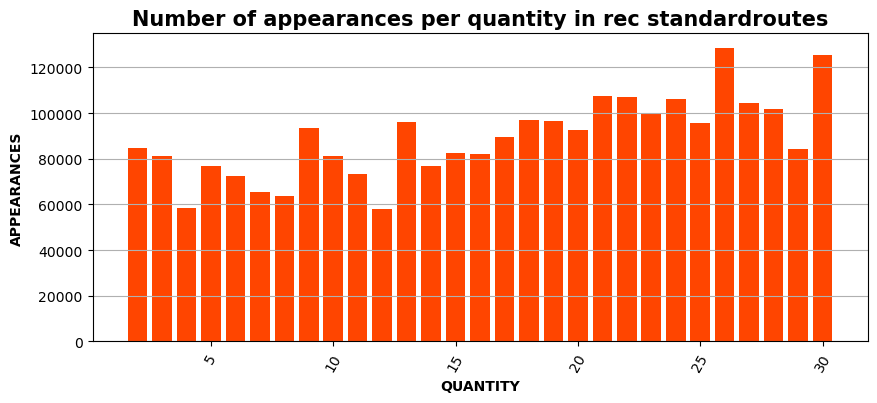

In [228]:
# function to plot the counts
def fun_plot_appearances(name, dict, color):

    # create barplot to view the number of appearances
    plt.figure(figsize=(10, 4))
    plt.bar(dict.keys(), dict.values(), color=color)

    # set title, edit axis and add legend
    plt.title('Number of appearances per {} in rec standardroutes'.format(name), fontsize=15, fontweight='bold')
    plt.ylabel('APPEARANCES', fontsize=10, fontweight='bold')
    plt.xlabel(name.upper(), fontsize=10, fontweight='bold')
    plt.xticks(rotation=60)

    # grid lines
    plt.grid(True, axis='y')

    return plt.show()

# execute function for a all count dicitonary
fun_plot_appearances('city', city_counts, 'indigo')
fun_plot_appearances('product', product_counts, 'seagreen')
fun_plot_appearances('quantity', quantitiy_counts, 'orangered')

In [229]:
#del rec_actual_routes

#sys.exit()

# **Evaluation - Problem 2**

### **Check whether the attributes of each driver are visible in the recommended standardroutes**

In [230]:
# # select file path for recommended standardroutes of the drivers
# subfolder_path = 'Solutions'
# file_path = os.path.join(current_directory, subfolder_path, 'driver.json')
# with open(file_path, 'r') as file:
#     rec_drivers = json.load(file)

# rec_drivers

In [231]:
display(df_drivers_attributes, driver_cities, driver_products)

,likes short routes,likes long routes,likes a city,dislikes a city,likes few products,likes many products,likes a product,dislikes a product,likes high quantities,likes low quantities
driver_A,Yes,-,-,-,-,-,-,-,Yes,-
driver_B,-,Yes,-,-,-,Yes,-,-,-,-
driver_C,-,Yes,Yes,-,-,-,-,Yes,-,-
driver_D,-,-,-,Yes,-,-,-,-,Yes,-
driver_E,-,-,Yes,-,Yes,-,-,-,-,-
driver_F,Yes,-,-,-,-,Yes,-,-,-,-
driver_G,Yes,-,-,-,-,-,Yes,-,-,-
driver_H,-,-,-,Yes,-,Yes,-,Yes,-,-
driver_I,-,-,-,-,-,-,Yes,-,Yes,-
driver_J,Yes,-,-,-,-,-,-,-,-,Yes


{'driver_C': ['Trento', 'Verona'],
 'driver_D': ['Milano', 'Palermo', 'Lecce'],
 'driver_E': ['Rome', 'Padova'],
 'driver_H': ['Lecce', 'Palermo', 'Udine']}

{'driver_C': ['Water', 'Milk', 'Fish'],
 'driver_G': ['Beer', 'Cheese'],
 'driver_H': ['Fish', 'Bread', 'Tomatoes'],
 'driver_I': ['Chocolate', 'Honey']}

### **Compare Similarity Scores**

**Create new actual routes for each driver with only his 5 recommended standardroutes and compute the mean similarity scores**

In [232]:
# define how many actual routes should be created for each of the 5 standardroutes for each driver
jobs_per_route = 200

# calculate the amount of actual routes per driver and in total
number_of_actual_routes = jobs_per_route * 5 #5 recommended standardroutes for each driver
print('Number of actual routes per driver: {}'.format(number_of_actual_routes))
print('Number of actual routes in total: {}'.format(number_of_actual_routes*len(drivers)))

Number of actual routes per driver: 1000
Number of actual routes in total: 10000


In [233]:
# dictionary to store the mean similarity score for each driver (given only the 5 recommended standardroutes)
mean_rec5_scores_d = {}

# loop to create for each driver new actual routes with its 5 recommended standardroutes and compute the mean similarity
for driver in tqdm(drivers):
    
    # select the 5 recommended standardroutes for the driver
    rec5_standardroutes = org_standardroutes[:5] #delete line if real recommended standardroutes are available
    #rec5_standardroutes = rec_drivers[driver]

    # create the actual routes for the driver
    actual_routes_driver = fun_aroutes(input_sr=rec5_standardroutes, driver_given=driver, prints=False, bar=False)

    # compute the similarity scores of all the just generated actual routes of the driver with its corresponding 5 recommended standardroutes for the driver
    scores_driver = compute_similarites(input_sr=rec5_standardroutes, input_ar=actual_routes_driver, prints=False, bar=False)

    # compute the mean similarity score of all scores for the driver
    mean = np.mean([i['score'] for i in scores_driver])

    # append the driver id and mean score to the dictionary
    mean_rec5_scores_d.update({driver: mean})

100%|██████████| 10/10 [00:23<00:00,  2.35s/it]


**Plot results**

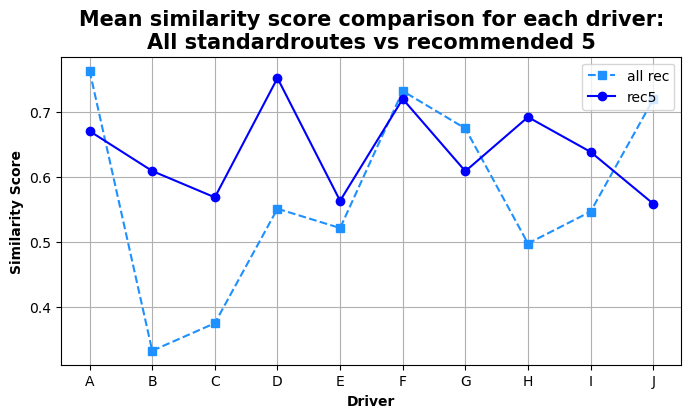

In [234]:
# use previous defined plot funciton to compare the mean scores for the drivers
fun_plot_scores(scores1=mean_rec_scores_d, scores2=mean_rec5_scores_d, 
                color1='dodgerblue', color2='blue',
                label1='all rec', label2='rec5', 
                title='Mean similarity score comparison for each driver:\nAll standardroutes vs recommended 5')

In [235]:
sys.exit()

SystemExit: 

C:\Users\Dennis\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# **Evaluation - Problem 3**

In [ ]:
# # select file path for recommended standardroutes
# file_path = os.path.join(current_directory, subfolder_path, 'perfectRoute.json')
# with open(file_path, 'r') as file:
#     perfectRoute = json.load(file)

In [ ]:
# define how many actual routes should be created for each of the 5 standardroutes for each driver
jobs_per_route = 100

# calculate the amount of actual routes per driver and in total
number_of_actual_routes = jobs_per_route #only one perfect route for each driver
print('Number of actual routes per driver: {}'.format(number_of_actual_routes))
print('Number of actual routes in total: {}'.format(number_of_actual_routes*len(drivers)))

Number of actual routes per driver: 100
Number of actual routes in total: 1000


**Create new actual routes for each driver with his perfect route and compute the mean similarity scores**

In [ ]:
# dictionary to store the mean similarity score for each driver
perfect_scores_d = {}

# loop to create for each driver new actual routes with its perfect standardroute and compute the similarity
#for driver in drivers:
    #perfect_standardroute = perfectRoute[driver]